# Análise de Perfis de Vítimas no Conflito Israel-Palestina


Vitor Albuquerque de Paula.

## Introdução

### Contexto
O conflito Israel-Palestina tem sido uma fonte prolongada de tensões e violência na região do Oriente Médio. A análise de dados referente às fatalidades e circunstâncias associadas pode oferecer insights sobre os padrões e características das vítimas envolvidas.

### Objetivo
Este projeto visa explorar e identificar perfis de vítimas utilizando a Rede SOM (Self-Organizing Map) para revelar padrões e agrupamentos nos dados disponíveis sobre os incidentes e fatalidades.

# Implementação da Rede SOM

## Variação de Parâmetros e Considerações Iniciais

Ao longo do desenvolvimento deste notebook, foram exploradas diversas configurações para a Rede SOM (Self-Organizing Maps) com o objetivo de identificar a que melhor desvendasse os padrões subjacentes nos dados do conflito Israel-Palestina. Foi realizada uma ampla experimentação, na qual variaram-se diversos parâmetros do modelo, incluindo:

- **Grid**: A dimensão da grade de neurônios (ou seja, a quantidade de neurônios) na rede SOM, que influencia diretamente na granularidade dos clusters formados.
- **Taxas**: As taxas de aprendizado e os raios dos vizinhos ao longo do treinamento, que podem afetar a convergência e a qualidade final do mapa.
- **Número de neurônios**: A quantidade de neurônios na rede, que também influencia na capacidade do modelo de capturar a variabilidade nos dados.
- **Número de iterações**: A quantidade de iterações durante o treinamento, que pode impactar na estabilidade dos padrões identificados pela rede.

A variação desses parâmetros foi crucial para explorar diferentes perspectivas e profundidades nas análises. Neste notebook, estão documentadas as análises e interpretações de dois modelos específicos que proporcionaram insights valiosos sobre os perfis das vítimas. Esses modelos foram escolhidos com base em sua habilidade de revelar agrupamentos que são, simultaneamente, estatisticamente robustos (conforme indicado por métricas de validação de cluster) e contextualmente relevantes para uma compreensão mais aprofundada do conflito.

Recomenda-se que futuras iterações e explorações deste notebook considerem variações adicionais desses parâmetros, ajustando-os conforme necessário para explorar novas perspectivas e nuances nos dados. A diversidade e a complexidade das dinâmicas presentes no conflito Israel-Palestina podem ainda revelar novas dimensões e padrões quando exploradas sob diferentes configurações de modelo.


## Importação e Preparação dos Dados

Foi utilizado o seguinte dataset: https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian

Vale notar que o DataSet utilizado ainda nao tem os dados do ataque feito pelo Hamas.

### Importação de Bibliotecas e Dados

In [37]:
import pandas as pd

# Carregar o dataset e visualizar as primeiras entradas
file_path = 'fatalities_isr_pse_conflict_2000_to_2023.csv'
data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
data.head()


,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


## Verificando Qualidade dos dados
Após o carregamento dos dados, exploramos informações gerais sobre os tipos de dados, a presença de valores ausentes e estatísticas descritivas básicas.

In [38]:
# Verificar valores ausentes
missing_values = data.isnull().sum()

# Verificar os tipos de dados
data_types = data.dtypes

(missing_values, data_types)
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
count,11124,11124,10995.000000,11124,11124,11124,11124,11124,11104,9694,11056,11056,10833,5871,11124,10844
unique,11083,2405,NaN,4,494,20,3,2593,2,5,580,20,13,21,3,6744
top,Name unknown to B'Tselem,2008-12-27,NaN,Palestinian,Gaza City,Gaza,Gaza Strip,2008-12-27,M,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed during ""Operation Defensive Shield."""
freq,23,357,NaN,10092,2232,2435,7733,341,9681,4653,2283,2453,9849,2877,10000,113
mean,NaN,NaN,26.745703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,13.780548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análise Exploratória Inicial

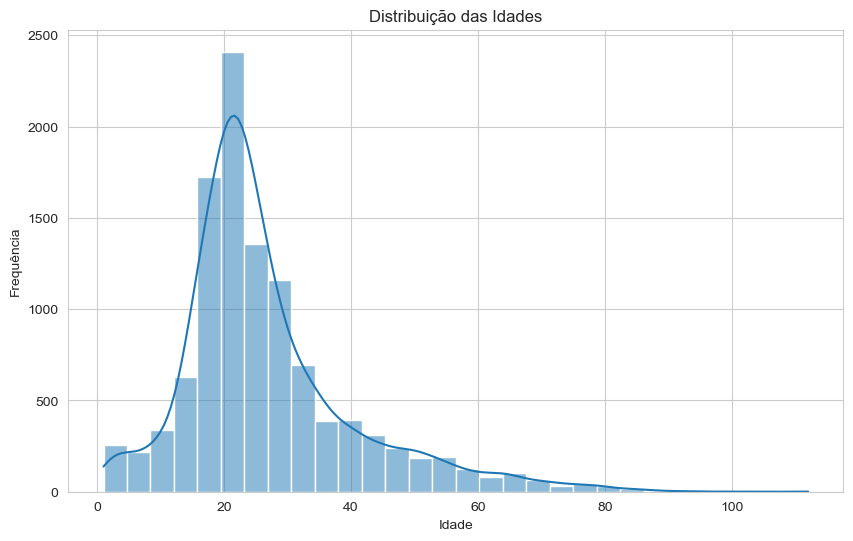

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set_style("whitegrid")

# Estatísticas descritivas básicas
desc_stats = data.describe()

# Visualizar a distribuição de algumas variáveis chave
plt.figure(figsize=(10, 6))
sns.histplot(data['age'].dropna(), bins=30, kde=True)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

(desc_stats)


## Explorando algumas Variáveis Categóricas

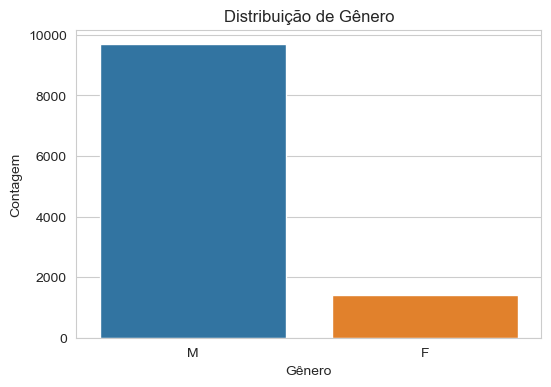

In [40]:
# Visualizar a distribuição do gênero
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='gender')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()


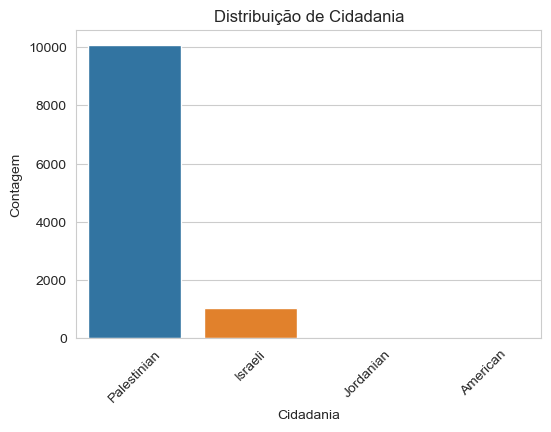

In [41]:
# Visualizar a distribuição da cidadania
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='citizenship')
plt.title('Distribuição de Cidadania')
plt.xlabel('Cidadania')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


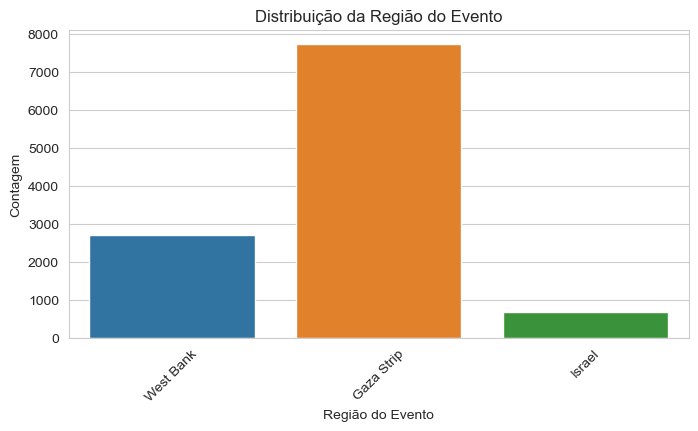

In [42]:
# Visualizar a distribuição da região do evento
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='event_location_region')
plt.title('Distribuição da Região do Evento')
plt.xlabel('Região do Evento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


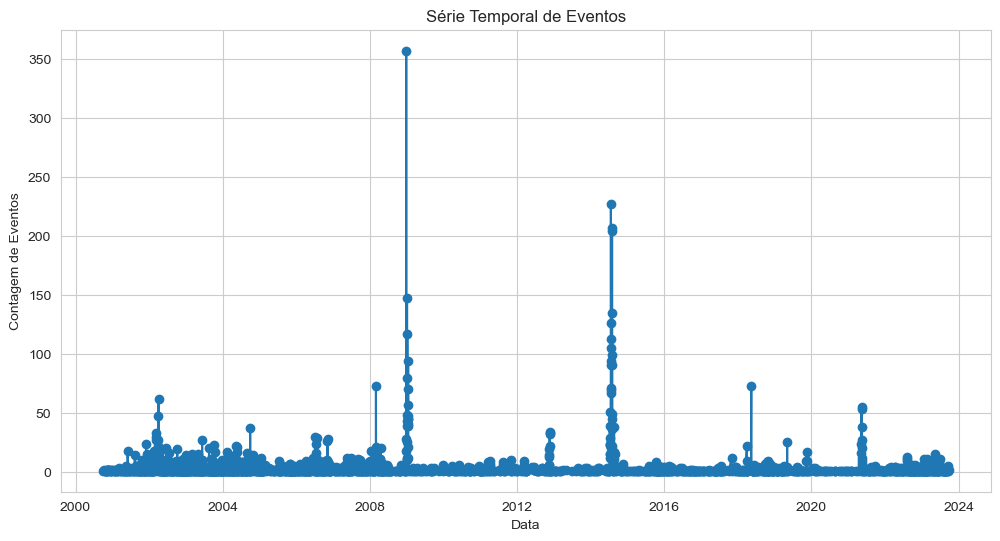

In [43]:
# Converter a coluna de data para o tipo datetime
data['date_of_event'] = pd.to_datetime(data['date_of_event'])

# Criar uma série temporal da contagem de eventos por data
time_series = data['date_of_event'].value_counts().sort_index()

# Visualizar a série temporal de eventos
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-')
plt.title('Série Temporal de Eventos')
plt.xlabel('Data')
plt.ylabel('Contagem de Eventos')
plt.show()


### Associaçao do grafico com eventos historicos
2008-2009: O pico observado pode ser associado à Operação Chumbo Fundido. Em dezembro de 2008 até janeiro de 2009, Israel lançou uma operação militar na Faixa de Gaza em resposta a disparos de foguetes de grupos militantes palestinos. A operação resultou em significativas baixas civis e infraestrutura danificada em Gaza.

2012: Este pico pode ser relacionado à Operação Pilar de Defesa. Em novembro de 2012, Israel lançou uma operação na Faixa de Gaza visando líderes e infraestrutura militar do Hamas, após um aumento nos disparos de foguetes para Israel.

2014: Entre julho e agosto de 2014, a Operação Margem Protetora foi lançada por Israel em resposta ao aumento dos disparos de foguetes do Hamas e outros grupos militantes de Gaza. Esta operação foi mais longa e resultou em um número significativo de baixas de ambos os lados.

2016: Embora 2016 tenha um pico visível, não há uma operação militar específica de grande escala associada a este ano. No entanto, houve tensões contínuas e episódios de violência, incluindo ataques esfaqueadores, tiroteios e confrontos.

2020: Este ano não é marcado por uma operação específica, mas foi um período de tensão crescente, especialmente em torno de questões como o plano de paz proposto pelos EUA e movimentos em relação à anexação de partes da Cisjordânia por Israel.

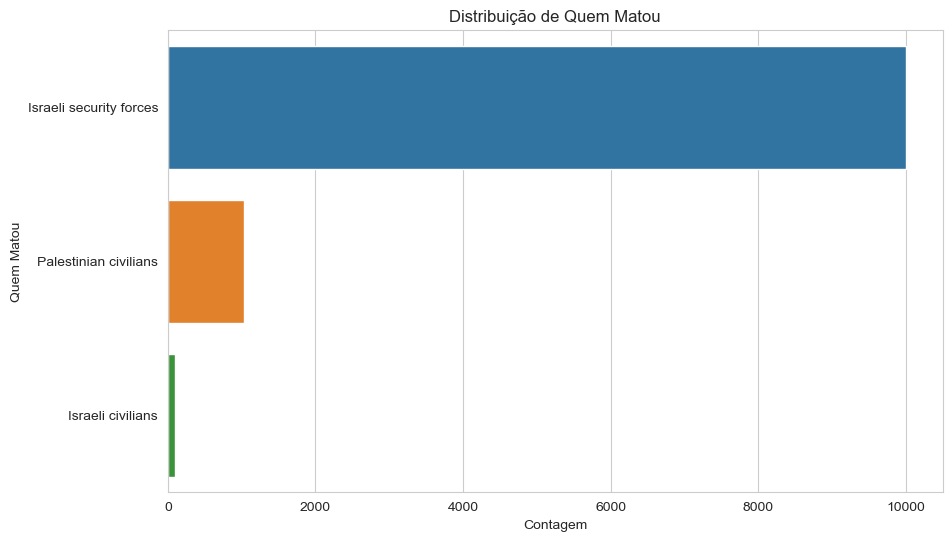

In [44]:
# Visualizar a distribuição de quem matou
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='killed_by')
plt.title('Distribuição de Quem Matou')
plt.xlabel('Contagem')
plt.ylabel('Quem Matou')
plt.show()


##  Modelagem com SOM

### Preparação dos Dados

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Selecione apenas as colunas numéricas (para simplificar o exemplo)
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Trate os valores ausentes conforme necessário
data_numeric = data_numeric.fillna(data_numeric.mean())

# Normalização dos dados
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data_numeric)


## Inicialização e Treinamento da SOM

In [46]:
# Instalar minisom

!pip install minisom

In [47]:
from minisom import MiniSom

# Inicialize a SOM
som_shape = (10, 10)  # Defina o tamanho da SOM conforme desejado
som = MiniSom(som_shape[0], som_shape[1], data_norm.shape[1], sigma=1.0, learning_rate=0.7)

# Treine a SOM
som.train(data_norm, 1000)  # O número de iterações (1000) pode ser ajustado conforme necessário


## Visualização

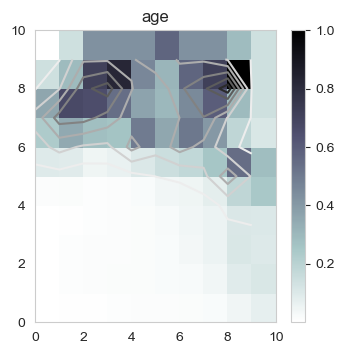

In [48]:
# Visualização dos Componentes Planos
plt.figure(figsize=(10, 10))
for i, f in enumerate(data_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(som.distance_map().T, cmap='bone_r'), plt.colorbar()
    plt.contour(som.distance_map().T, cmap='Greys')
plt.tight_layout()
plt.show()


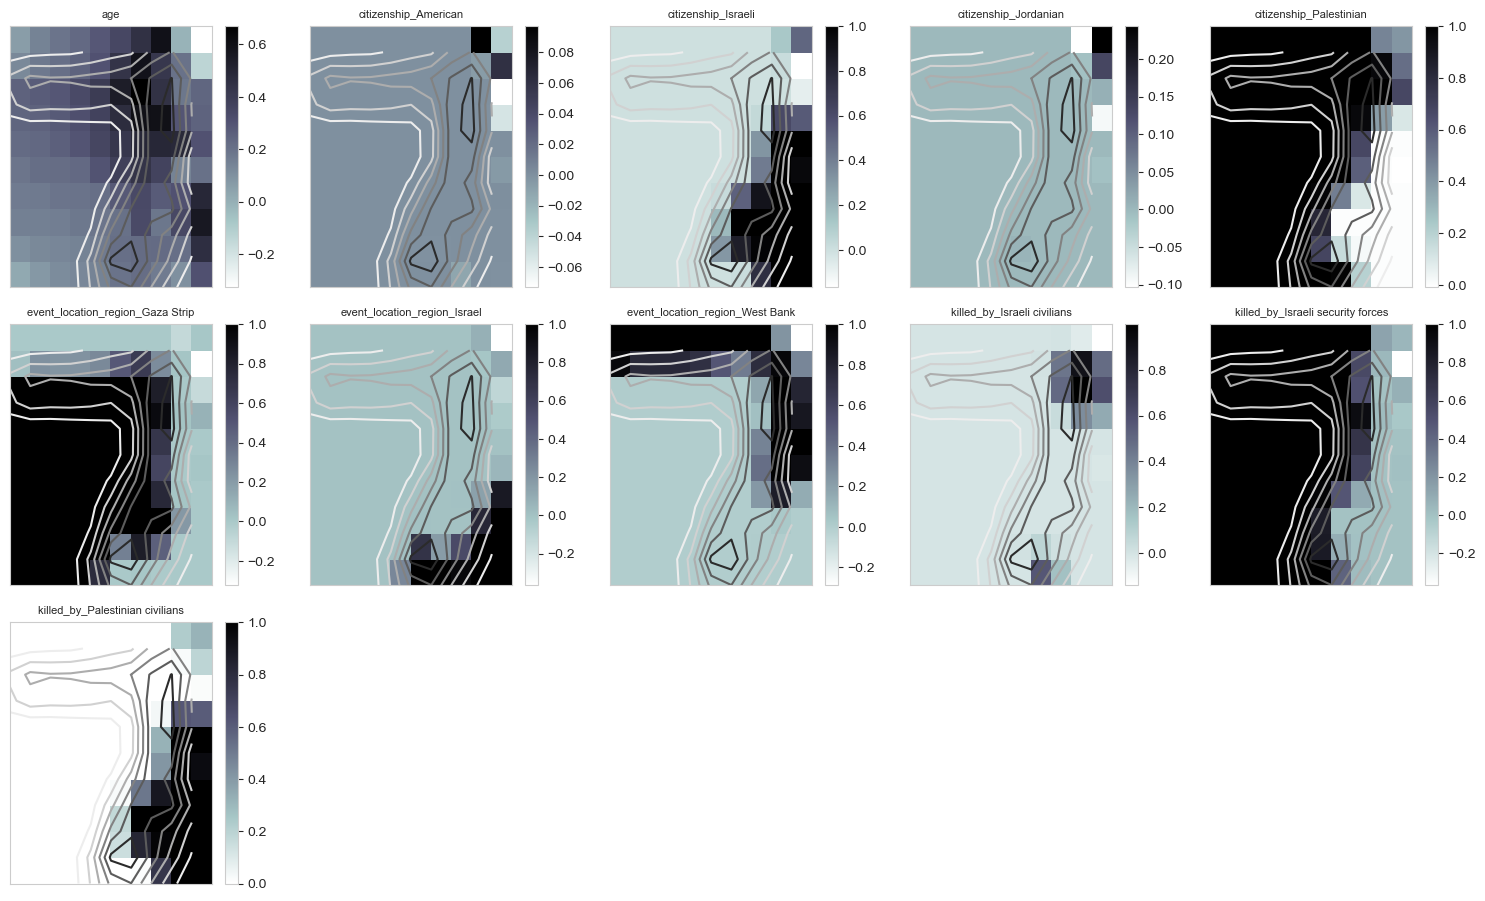

In [49]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Selecione as variáveis categóricas de interesse
cat_vars = data[['citizenship', 'event_location_region', 'killed_by']]

# Trate os valores ausentes conforme necessário
cat_vars = cat_vars.fillna('Unknown')

# Codificação one-hot das variáveis categóricas
encoder = OneHotEncoder(sparse=False)
cat_encoded = encoder.fit_transform(cat_vars)

# Adicionar as variáveis codificadas aos dados numéricos e normalizar
data_combined = pd.concat([data_numeric, pd.DataFrame(cat_encoded)], axis=1)

# Convertendo os nomes das colunas para string
data_combined.columns = data_combined.columns.astype(str)

# Normalização dos dados
scaler = MinMaxScaler()
data_combined_norm = scaler.fit_transform(data_combined)

# Inicialize e treine a SOM com os dados combinados
som_shape = (10, 10)
som = MiniSom(som_shape[0], som_shape[1], data_combined_norm.shape[1], sigma=1.0, learning_rate=0.5)
som.train(data_combined_norm, 10000)

# Visualização dos Componentes Planos
#

plt.figure(figsize=(15, 15))
for i, f in enumerate(data_numeric.columns.tolist() + encoder.get_feature_names_out(cat_vars.columns).tolist()):
    plt.subplot(5, 5, i+1)
    plt.title(f, fontsize=8)
    plt.pcolor(som.get_weights()[:,:,i].T, cmap='bone_r'), plt.colorbar()
    plt.contour(som.distance_map().T, cmap='Greys')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()



## Identificação de Clusters:

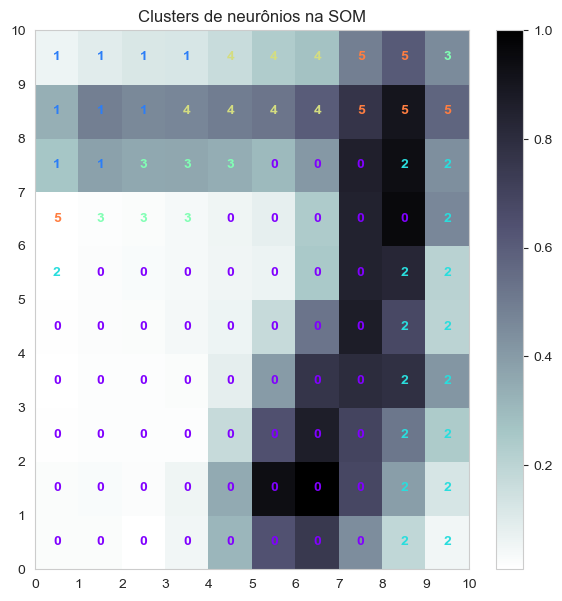

In [50]:
from sklearn.cluster import KMeans
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Obter os pesos da SOM
weights = som.get_weights()

# Redimensionar os pesos para o formato (num_neurons, num_features)
weights_reshaped = np.reshape(weights, (som_shape[0]*som_shape[1], data_combined_norm.shape[1]))

# Escolher um número de clusters
num_clusters = 6  # Testei com diferentes numeros de clusters, para encontrar um adequado ao problema

# Aplicar k-means aos pesos dos neurônios
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(weights_reshaped)

# Obter os rótulos de cluster para cada neurônio
neuron_labels = kmeans.labels_

# Visualizar os clusters na SOM
plt.figure(figsize=(7, 7))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Plotar a distância mapa como fundo
plt.colorbar()

# Colorir os neurônios com base nos rótulos de cluster
for i, l in enumerate(neuron_labels):
    plt.text(i%som_shape[0]+.5, i//som_shape[1]+.5, l, color=plt.cm.rainbow(l/num_clusters),
             ha='center', va='center', fontsize=10, fontweight='bold')

plt.title('Clusters de neurônios na SOM')
plt.xticks(np.arange(som_shape[0]+1))
plt.yticks(np.arange(som_shape[1]+1))
plt.grid()
plt.show()


## Perfil de Cluster:

In [51]:
# Vamos criar um DataFrame para armazenar as estatísticas descritivas de cada cluster
cluster_profile = pd.DataFrame()

# Para cada cluster, calcule a média dos pesos dos neurônios pertencentes a esse cluster
for cluster in range(num_clusters):
    cluster_neurons = weights_reshaped[neuron_labels == cluster]
    cluster_mean = cluster_neurons.mean(axis=0)
    cluster_profile[f'Cluster {cluster}'] = cluster_mean

# Transpor o DataFrame para melhor visualização
cluster_profile = cluster_profile.transpose()
cluster_profile.columns = data_numeric.columns.tolist() + encoder.get_feature_names_out(cat_vars.columns).tolist()

print(cluster_profile)


                age  citizenship_American  citizenship_Israeli  \
Cluster 0  0.278309          4.152035e-07         1.576501e-02   
Cluster 1  0.319776         -1.207791e-03         9.704425e-01   
Cluster 2  0.276849         -2.932965e-06         2.194982e-07   
Cluster 3  0.200427         -5.404844e-03         7.374296e-01   
Cluster 4  0.283027         -8.198513e-03         8.728917e-01   
Cluster 5  0.115450          1.301508e-02        -1.522259e-02   

           citizenship_Jordanian  citizenship_Palestinian  \
Cluster 0           1.171201e-04                 0.984113   
Cluster 1           5.872363e-05                 0.024526   
Cluster 2           9.011465e-07                 0.999949   
Cluster 3           3.493613e-02                 0.248331   
Cluster 4          -1.450434e-02                 0.068450   
Cluster 5           5.192744e-03                 0.771875   

           event_location_region_Gaza Strip  event_location_region_Israel  \
Cluster 0                       

In [52]:
import pandas as pd

# Encontrar o neurônio vencedor para cada ponto de dado
winner_coordinates = np.array([som.winner(x) for x in data_combined_norm])

# Converta as coordenadas do neurônio vencedor em um índice único
winner_index = np.ravel_multi_index(winner_coordinates.T, (som_shape[0], som_shape[1]))

# Mapear o índice do neurônio para o rótulo do cluster
data_cluster_labels = neuron_labels[winner_index]

# Adicionar rótulos de cluster ao conjunto de dados para análise
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = data_cluster_labels

# Visualizar a contagem de dados em cada cluster
cluster_count = data_with_cluster['Cluster'].value_counts().sort_index()
print("Número de pontos de dados em cada cluster:")
print(cluster_count)


Número de pontos de dados em cada cluster:
Cluster
0    7549
1     550
2    2455
3     186
4     292
5      92
Name: count, dtype: int64


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular e exibir estatísticas descritivas para cada cluster
cluster_description = data_with_cluster.groupby('Cluster').describe()
print(cluster_description)




        date_of_event                                                      \
                count                           mean                  min   
Cluster                                                                     
0                7549  2010-07-05 11:30:54.603258624  2000-12-07 00:00:00   
1                 550  2004-09-20 01:52:34.909091072  2000-11-02 00:00:00   
2                2455  2009-05-19 01:06:16.863543552  2001-10-04 00:00:00   
3                 186  2006-04-11 01:25:09.677419392  2000-11-08 00:00:00   
4                 292  2007-07-14 04:16:26.301369856  2000-10-02 00:00:00   
5                  92  2011-05-08 17:13:02.608695552  2000-10-07 00:00:00   

                                                                        \
                         25%                  50%                  75%   
Cluster                                                                  
0        2006-09-30 00:00:00  2009-01-11 00:00:00  2014-07-25 00:00:00   
1        2

## Validar o Cluster e Avaliação da Homogeneidade dos Agrupamentos

In [54]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Avaliar os clusters usando Solhouette Score
sil_score = silhouette_score(data_combined_norm, data_cluster_labels, metric='euclidean')

print(f"Silhouette Score: {sil_score:.2f}")

# Avaliar os clusters usando Davies-Bouldin Score
db_score = davies_bouldin_score(data_combined_norm, data_cluster_labels)
print(f'Davies-Bouldin Score: {db_score}')

# Avaliar os clusters usando Calinski-Harabasz Score
ch_score = calinski_harabasz_score(data_combined_norm, data_cluster_labels)
print(f'Calinski-Harabasz Score: {ch_score}')




Silhouette Score: 0.89
Davies-Bouldin Score: 0.22447458706012705
Calinski-Harabasz Score: 46056.50747584292


### Para numero de clusters = 3 

#### Silhouette Score: 0.85

Um score de Silhouette varia de -1 a 1, onde um valor elevado indica que o objeto está bem pareado com os outros objetos no seu cluster e mal pareado com os objetos em clusters vizinhos. Um score de 0.85 é excepcionalmente bom, indicando que os clusters estão bem separados e que os objetos dentro de um mesmo cluster são semelhantes.

#### Davies-Bouldin Score: 0.436

O índice de Davies-Bouldin é uma métrica onde valores mais baixos indicam melhores configurações de cluster, porque um valor menor indica menor semelhança entre os clusters. O valor de 0.436 é bastante baixo, sugerindo que os clusters estão bem separados e definidos, o que é desejável.

#### Calinski-Harabasz Score: 35941.63

O score Calinski-Harabasz avalia a dispersão entre clusters em relação à dispersão dentro dos clusters, com valores mais altos indicando clusters melhor definidos. Um valor de 35941.63 é muito alto, especialmente considerando que valores maiores são melhores. Isso sugere que os clusters estão bem separados.

#### Conclusão para 3 clusters:
Com base nessas métricas, os clusters formados parecem ser bastante distintos e bem separados uns dos outros, o que sugere que o modelo de clustering foi bem-sucedido em encontrar agrupamentos significativos nos dados. Estes agrupamentos provavelmente refletem padrões reais nos dados e, portanto, podem ser usados com confiança para análises subsequentes e tomada de decisões.

### Para número de clusters = 5

#### Silhouette Score: 0.89

O score de Silhouette de 0.89, superior até mesmo ao obtido para a configuração de três clusters, reforça uma robusta coesão intragrupo e uma notável separação entre os diferentes clusters. Este valor, aproximando-se de 1, sugere que as alocações aos clusters são adequadas e que os elementos compartilham semelhanças significativas dentro dos seus respectivos agrupamentos.

#### Davies-Bouldin Score: 0.234

Com um Davies-Bouldin Score de 0.234, temos uma indicação de que os clusters estão ainda mais bem definidos na configuração de cinco agrupamentos quando comparado ao cenário de três. Este valor, substancialmente menor, denota que os clusters estão menos similares entre si, o que é uma característica desejável, proporcionando uma clara distinção entre os agrupamentos.

#### Calinski-Harabasz Score: 45523.43

O Calinski-Harabasz Score para esta configuração de cinco clusters é de 45523.43, que, sendo superior ao score obtido na configuração de três clusters, sugere que esta configuração tem uma maior separação entre os clusters em relação à dispersão intragrupo. Este score robusto indica uma estrutura de cluster forte e bem definida.

#### Conclusão para 5 Clusters:

A configuração de cinco clusters não apenas apresenta métricas de validação impressionantes, mas também ressalta agrupamentos que são interpretáveis e contextualmente relevantes, com destaque para a distinção adicional de perfis entre Israelenses civis em diferentes localidades. A acurada separação dos clusters e a relevância contextual dos agrupamentos sugerem que esta configuração oferece insights valiosos e um maior discernimento sobre as distintas dinâmicas presentes nos dados.

### Comparativo: 3 vs 5 Clusters

Ao compararmos as configurações de três e cinco clusters, observamos que ambas apresentam métricas robustas de validação, evidenciando que os agrupamentos estão bem definidos e separados. Entretanto, a configuração de cinco clusters apresenta scores ligeiramente superiores em todas as três métricas avaliadas, indicando que esta configuração pode oferecer uma representação mais apropriada e discriminativa dos padrões subjacentes nos dados.

Além disso, a emergência de dois novos clusters, distinguindo Israelenses civis em diferentes regiões, na configuração de cinco agrupamentos, oferece uma perspectiva adicional sobre a complexidade e a especificidade das vítimas envolvidas no conflito. Esta distinção adicional pode ser crucial para entender as diferentes dinâmicas e contextos enfrentados pelos civis em diferentes localidades, permitindo uma análise mais granular e específica das circunstâncias e características das vítimas em diferentes contextos geográficos e situações.

A escolha entre as configurações, portanto, pode ser informada não apenas pelas métricas de validação, mas também pela relevância e aplicabilidade dos insights gerados pelos clusters à pesquisa e às questões em estudo.

# Analise do perfil das vitimas no conflito

### Distribuiçao das caracteristicas por cluster


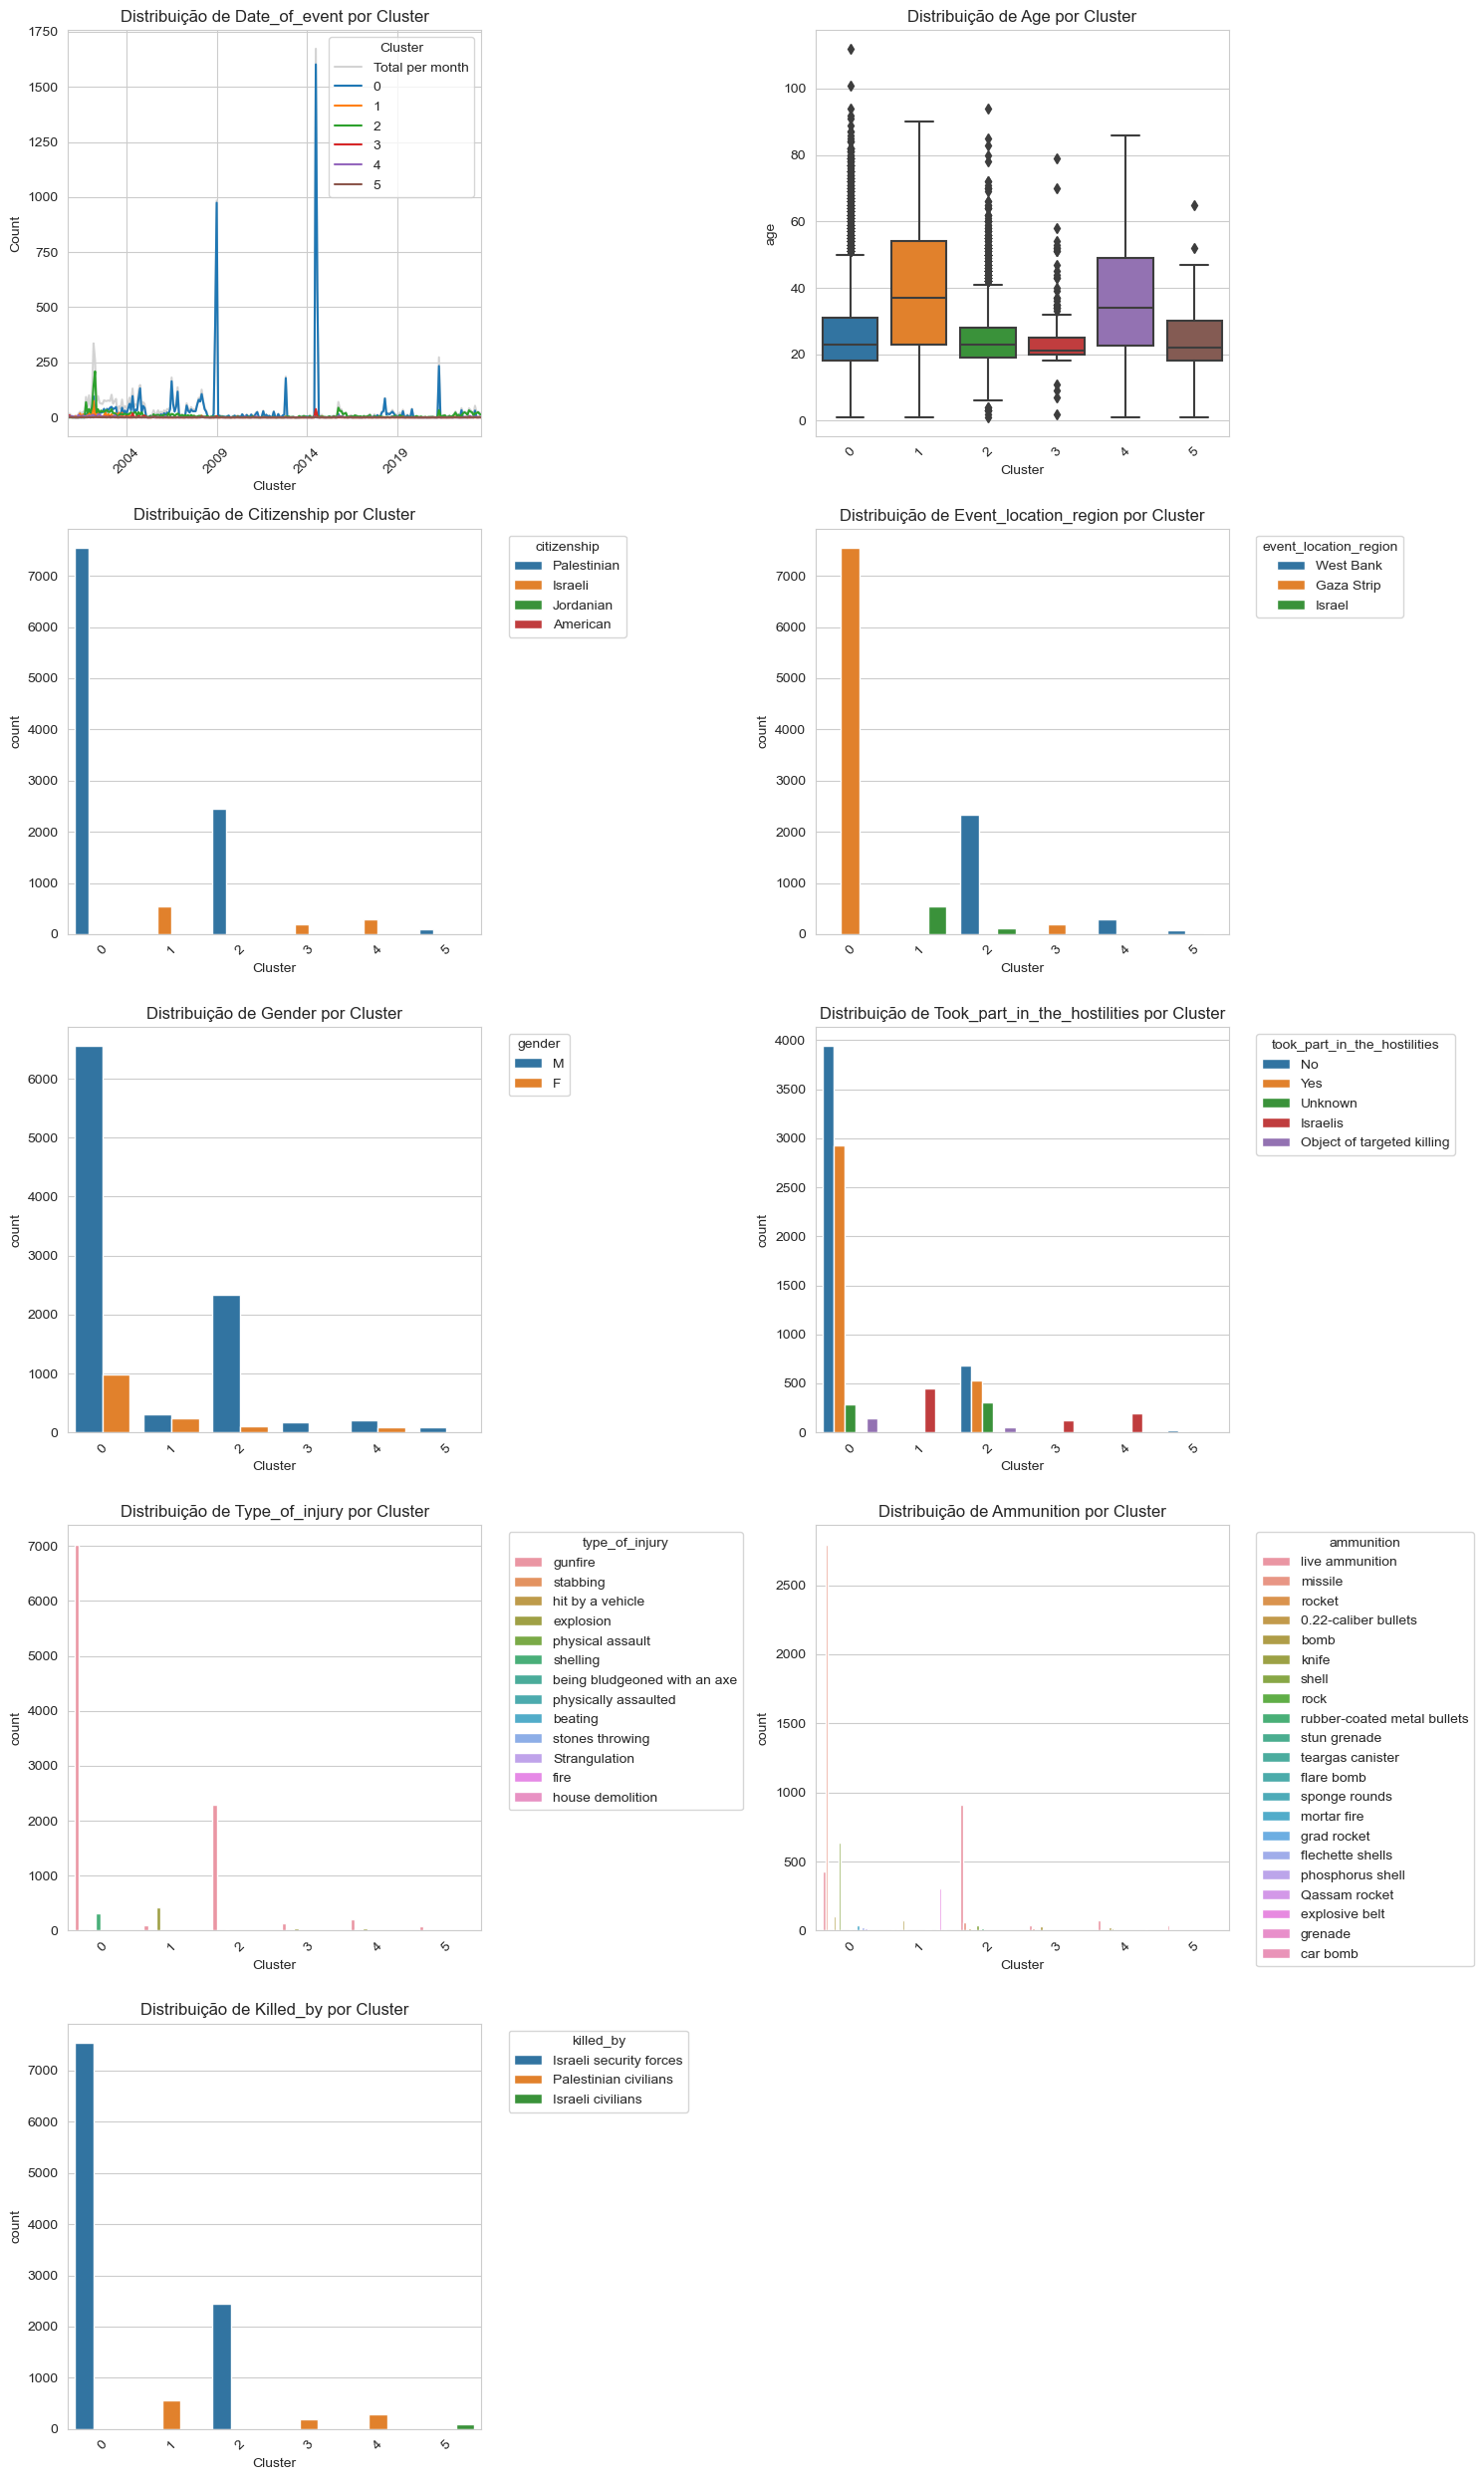

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Variáveis específicas e os tipos de gráficos correspondentes
variables_and_plots = {
    'date_of_event': 'time_series',
    'age': 'boxplot',
    'citizenship': 'countplot',
    'event_location_region': 'countplot',
    'gender': 'countplot',
    'took_part_in_the_hostilities': 'countplot',
    'type_of_injury': 'countplot',
    'ammunition': 'countplot',
    'killed_by': 'countplot'
}

# Configuração de layout
num_vars = len(variables_and_plots)
num_cols = 2  
num_rows = int(np.ceil(num_vars / num_cols))  

data_with_cluster['date_of_event'] = pd.to_datetime(data_with_cluster['date_of_event'], errors='coerce')
data_with_cluster['date_of_death'] = pd.to_datetime(data_with_cluster['date_of_death'], errors='coerce')


plt.figure(figsize=(15, 5*num_rows))

for i, (var, plot_type) in enumerate(variables_and_plots.items()):
    plt.subplot(num_rows, num_cols, i+1)
    
    if plot_type == 'time_series':
        data_with_cluster.set_index(var).resample('M').size().plot(label='Total per month', color='lightgrey')
        data_with_cluster.groupby([var, 'Cluster']).size().unstack().resample('M').sum().plot(ax=plt.gca())
        plt.ylabel('Count')
        plt.legend(title='Cluster')
        
    elif plot_type == 'boxplot':
        sns.boxplot(data=data_with_cluster, x='Cluster', y=var)
        
    elif plot_type == 'countplot':
        sns.countplot(data=data_with_cluster, x='Cluster', hue=var)
        plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
        
    plt.title(f'Distribuição de {var.capitalize()} por Cluster')
    plt.xlabel('Cluster')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


## Interpretação dos resultados

A análise exploratória e a modelagem via Rede de Mapas Auto-Organizáveis (SOM) aplicadas ao estudo do conflito Israel-Palestina proporcionaram insights valiosos e reveladores a respeito dos perfis das vítimas envolvidas. Inicialmente, nossa análise revelou três perfis distintos e informativos, agrupando as vítimas em categorias de Israelitas, Palestinos na Faixa de Gaza e Palestinos na Cisjordânia, cada qual refletindo nuances particulares e significativas deste cenário de conflito.

Um esforço adicional foi realizado para explorar a robustez e a aplicabilidade de diferentes configurações da SOM. Diversas combinações de parâmetros e estruturas de rede foram testadas, visando não apenas validar os agrupamentos iniciais, mas também explorar potenciais padrões adicionais que pudessem emergir a partir dos dados. Ao modificar a configuração da rede para identificar cinco clusters, uma nova perspectiva foi revelada. Os dois novos agrupamentos, aparentemente, distinguem Israelenses civis nas regiões de Israel e da Cisjordânia, indicando que os civis tendem a ser vítimas de formas específicas de violência, como mísseis, explosões e esfaqueamentos.

Este estudo, portanto, não apenas valida o uso de técnicas de aprendizado de máquina, como a SOM, em contextos geopolíticos e humanitários complexos, mas também enfatiza a importância de uma abordagem iterativa e exploratória na modelagem. A capacidade de revelar agrupamentos e padrões intrínsecos, explorando diferentes configurações de modelagem, destaca a versatilidade e o potencial da SOM em oferecer novas perspectivas e compreensões em estudos de conflitos, contribuindo assim para abordagens mais informadas e matizadas em futuras análises e estratégias relacionadas a contextos de guerra e conflito.